In [ ]:
!pip list

In [ ]:
#!pip install pandas

In [ ]:
#!pip install sklearn

In [ ]:
!pip install seaborn

In [ ]:
#!pip install tqdm

In [43]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

from scipy.stats import pearsonr

In [44]:
# Read Training and Test Data into dataframes
training_data = pd.read_csv('training_set.csv',index_col=0)
test_data = pd.read_csv('test_set.csv',index_col=0)

In [45]:
training_data.shape, test_data.shape

((3910, 58), (691, 57))

In [46]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 690
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      691 non-null    float64
 1   X2      691 non-null    float64
 2   X3      691 non-null    float64
 3   X4      691 non-null    float64
 4   X5      691 non-null    float64
 5   X6      691 non-null    float64
 6   X7      691 non-null    float64
 7   X8      691 non-null    float64
 8   X9      691 non-null    float64
 9   X10     691 non-null    float64
 10  X11     691 non-null    float64
 11  X12     691 non-null    float64
 12  X13     691 non-null    float64
 13  X14     691 non-null    float64
 14  X15     691 non-null    float64
 15  X16     691 non-null    float64
 16  X17     691 non-null    float64
 17  X18     691 non-null    float64
 18  X19     691 non-null    float64
 19  X20     691 non-null    float64
 20  X21     691 non-null    float64
 21  X22     691 non-null    float64
 22  X2

In [48]:
training_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [49]:
test_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,...,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,...,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,...,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,4.540000,14.280000,5.100000,35.460000,10.000000,5.880000,5.400000,4.620000,5.260000,4.540000,...,2.560000,4.121000,2.941000,4.081000,5.803000,1.357000,3.879000,664.000000,1327.000000,15841.000000


In [50]:
#Chekcing for missing data
training_data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [51]:
#Chekcing for missing data
test_data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
dtype: int64

In [52]:
data = training_data.copy()

In [53]:
data = sorted(data)

In [54]:
data

['X1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X2',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X3',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X4',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X5',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y']

In [55]:
# Computing 1st, 99th percentiles and replacing the outliers
for col in training_data.columns[:57]:
    percentiles = training_data[col].quantile([0.01, 0.99]).values
    training_data[col][training_data[col] <= percentiles[0]] = percentiles[0]
    training_data[col][training_data[col] >= percentiles[1]] = percentiles[1]

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
training_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.0,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.094790,0.117538,0.277143,0.0,0.296614,0.091211,0.104094,0.093073,0.087898,0.226884,...,0.025769,0.131904,0.012660,0.238767,0.068272,0.025548,3.494997,46.924041,272.787366,0.392327
std,0.236788,0.374532,0.464072,0.0,0.557566,0.227973,0.316409,0.274856,0.249599,0.506636,...,0.088990,0.186973,0.044342,0.443160,0.157335,0.097150,4.451228,103.076506,481.828826,0.488331
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.0,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,1.240000,2.654600,2.338200,0.0,2.940000,1.199100,1.958200,1.619100,1.380000,2.748200,...,0.635820,0.974200,0.272000,2.635550,0.893460,0.744250,36.535710,669.000000,3032.640000,1.000000


In [57]:
# Computing 1st, 99th percentiles and replacing the outliers
for col in test_data.columns[:57]:
    percentiles = test_data[col].quantile([0.01, 0.99]).values
    test_data[col][test_data[col] <= percentiles[0]] = percentiles[0]
    test_data[col][test_data[col] >= percentiles[1]] = percentiles[1]

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\gaurav tibude\arya.ai process\arya test project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [58]:
test_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.107135,0.184051,0.248507,0.001586,0.294362,0.084250,0.114543,0.079333,0.074255,0.200408,...,0.017232,0.027223,0.133028,0.011339,0.229482,0.061281,0.033187,3.900000,48.505065,262.094356
std,0.298599,0.873747,0.438241,0.014669,0.576221,0.225934,0.324825,0.241799,0.218740,0.436254,...,0.098775,0.095837,0.199625,0.045517,0.393269,0.150077,0.127022,6.717888,106.784469,441.280252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,...,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,2.000000,7.737000,2.044000,0.138000,3.072000,1.271000,1.717000,1.457000,1.150000,1.976000,...,0.771000,0.678900,1.102800,0.308000,1.965600,0.839300,0.906900,58.618400,669.000000,2714.600000


In [85]:
# feature selection :-

dataset = training_data.copy()
X = dataset.drop(['Y'], axis=1)
y = dataset['Y']

# LASSO Regularization
lr = LogisticRegression(penalty='l1', C=1, random_state=29, solver='liblinear')
lr.fit(X, y)
sfm = SelectFromModel(lr, prefit=True)
features = dataset.drop(['Y'], axis=1).columns
lasso_feat = list(features[sfm.get_support()])
print("\n\nLASSO Regularization based Imp Features:\n","-"*30,"\n", lasso_feat)
lasso_feat.append('Y')

# Tree based Feature Importance
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(X, y)
sfm_tree = SelectFromModel(clf, prefit=True)
features = dataset.drop(['Y'], axis=1).columns
extra_tree_feat = list(features[sfm_tree.get_support()])
print("\n\nTree based Imp Features:\n","-"*30,"\n",extra_tree_feat)
extra_tree_feat.append('Y')

# Tree based Feature Importance
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
sfm_tree = SelectFromModel(clf, prefit=True)
features = dataset.drop(['Y'], axis=1).columns
random_forest_clf_feat = list(features[sfm_tree.get_support()])
print("\n\nRandom Forest Tree based Imp Features:\n","-"*30,"\n",random_forest_clf_feat)
random_forest_clf_feat.append('Y')



LASSO Regularization based Imp Features:
 ------------------------------ 
 ['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X33', 'X35', 'X36', 'X37', 'X39', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X48', 'X49', 'X50', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']


Tree based Imp Features:
 ------------------------------ 
 ['X5', 'X6', 'X7', 'X8', 'X11', 'X16', 'X17', 'X19', 'X21', 'X23', 'X24', 'X25', 'X52', 'X53', 'X55', 'X56', 'X57']


Random Forest Tree based Imp Features:
 ------------------------------ 
 ['X5', 'X7', 'X16', 'X17', 'X19', 'X21', 'X23', 'X24', 'X25', 'X26', 'X27', 'X52', 'X53', 'X55', 'X56', 'X57']


In [96]:
feature_sets = [lasso_feat,
                extra_tree_feat,
                random_forest_clf_feat
                ]

names = ["Logistic Regression",
         "Decision Tree", 
         "Random Forest"
        ]

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

datasets = []
for feat_set in feature_sets:
    datasets.append(training_data.loc[:, feat_set])

3it [00:00,  3.26it/s]
3it [00:00,  4.83it/s]
3it [00:00,  4.36it/s]


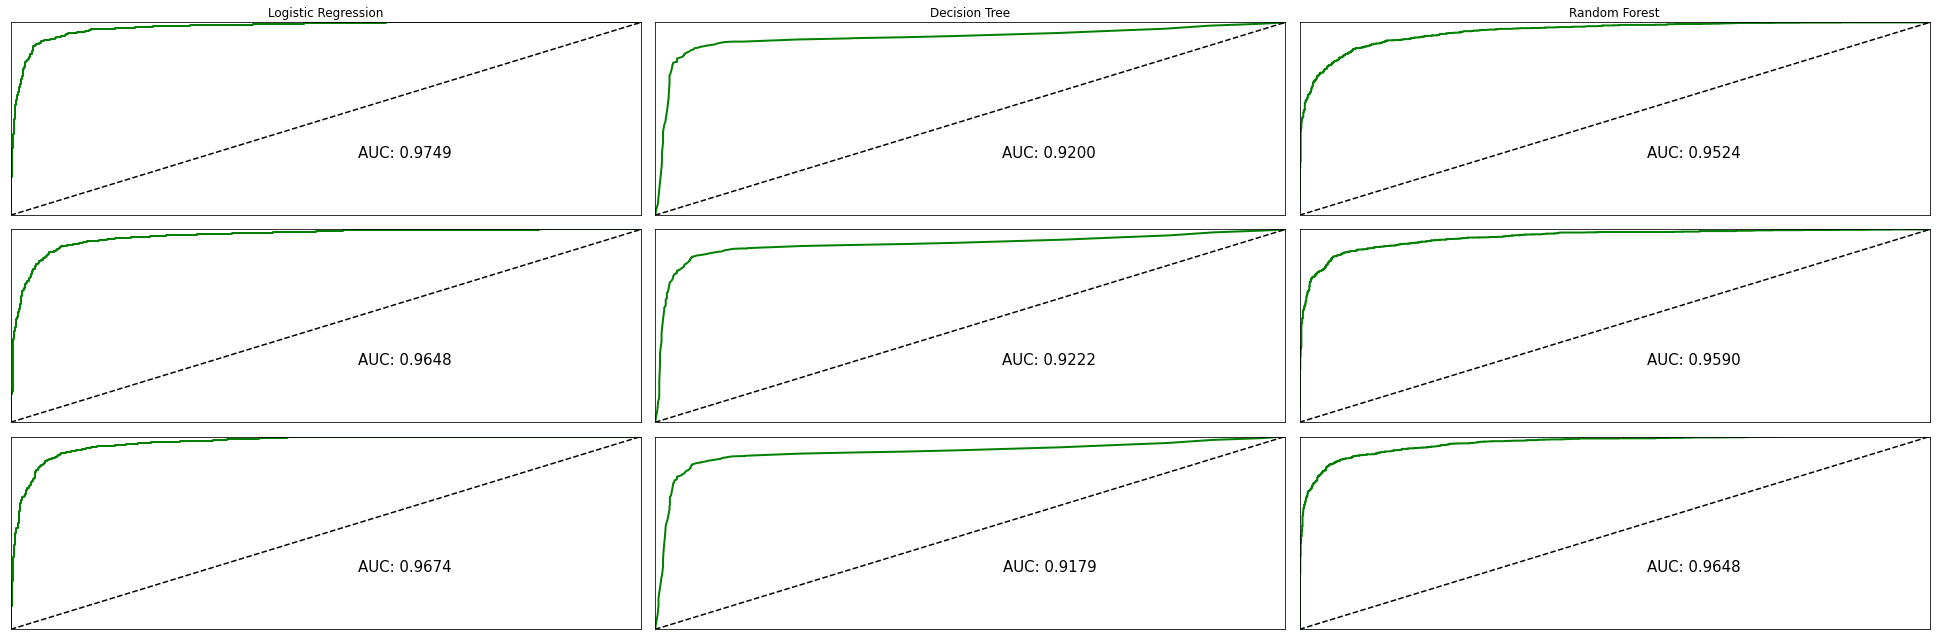

In [97]:
figure = plt.figure(figsize=(27, 9))
i=1
auc_results = []

for ds_cnt, ds in enumerate(datasets):
    X = ds.drop(['Y'], axis=1)
    y = ds['Y']
    X = StandardScaler().fit_transform(X)
    
    sss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=29)
    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
    
    for name, clf in tqdm(zip(names, classifiers)):
        ax = plt.subplot(len(datasets), len(classifiers), i)
        clf.fit(X_train, y_train)
        
        try:
            y_pred_probas = cross_val_predict(clf, X_train, y_train, cv=10, method="predict_proba")
            y_pred = y_pred_probas[:, -1]
        except:
            y_pred = cross_val_predict(clf, X_train, y_train, cv=10, method="decision_function")
        
        fpr, tpr, thresholds = roc_curve(y_train, y_pred)
        
        _auc = auc(fpr,tpr)
        if ds_cnt == 0:
            auc_results.append(('lasso_feat', name, _auc))
        elif ds_cnt == 1:
            auc_results.append(('extra_tree_feat', name, _auc))
        else:
            auc_results.append(('random_forest_clf_feat', name, _auc))
        
        ax.plot(fpr, tpr, "g-", linewidth=2)
        ax.plot([0,1],[0,1], 'k--')
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0.7, 0.3, "AUC: {:.4f}".format(_auc).lstrip('0'), 
                size=15, horizontalalignment="right")
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)

        i += 1
        
plt.tight_layout()
plt.show()

In [98]:
auc_results

[('lasso_feat', 'Logistic Regression', 0.974904006691817),
 ('lasso_feat', 'Decision Tree', 0.9199633047453001),
 ('lasso_feat', 'Random Forest', 0.9524067473581543),
 ('extra_tree_feat', 'Logistic Regression', 0.9647554228240677),
 ('extra_tree_feat', 'Decision Tree', 0.9222009090389919),
 ('extra_tree_feat', 'Random Forest', 0.9589669899477173),
 ('random_forest_clf_feat', 'Logistic Regression', 0.967427222571221),
 ('random_forest_clf_feat', 'Decision Tree', 0.9178606341773131),
 ('random_forest_clf_feat', 'Random Forest', 0.9647850970459032)]

In [101]:
print("Best score: ", max(list(zip(*auc_results))[2]))
arg_pos = np.argmax(list(zip(*auc_results))[2])

print("Best Performer: ", auc_results[arg_pos])

Best score:  0.974904006691817
Best Performer:  ('lasso_feat', 'Logistic Regression', 0.974904006691817)


In [106]:
# Save best features set to csv
np.savetxt("best_features_list.csv", 
           eval(auc_results[arg_pos][0]),
           delimiter =", ", 
           fmt ='% s')